In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

def sim(A, B):
  """
  A, B - python's set {} 
  Jaccard Distance = 1 - len(A & B)/len(A | B)
  """
  return len(A & B)/len(A | B)
  
def sim_list(A, B):
  """
  A, B - python's list [] 
  Jaccard Distance = 1 - len(A & B)/len(A | B)
  """
  intersect = [x for x in A if x in B]
  union = A+B
  print(len(intersect))
  print(union)
  return len(intersect)/len(union)

In [ ]:
df_dc = pd.read_csv('https://raw.githubusercontent.com/baohuy251210/ComicCharactersMining/main/data/wikia/dc-wikia-data.csv') 
print(df_dc.columns)
print(df_dc.shape)

Index(['Unnamed: 0', 'page_id', 'name', 'urlslug', 'id', 'align', 'eye',
       'hair', 'sex', 'gsm', 'alive', 'appearances', 'first appearance',
       'year'],
      dtype='object')
(6896, 14)


In [ ]:
df = df_dc[(df_dc['year'] <= 1975)]
pd.set_option('display.max_columns', 7)

In [ ]:
df_nextperiod = df_dc[(df_dc['year'] > 1975) & (df_dc['year'] <= 1995)]
pd.set_option('display.max_columns', 7)
print(df_nextperiod[['name', 'id','align']].head())

                            name               id            align
1          Superman (Clark Kent)  Secret Identity  Good Characters
3       James Gordon (New Earth)  Public Identity  Good Characters
7      Timothy Drake (New Earth)  Secret Identity  Good Characters
17       Kyle Rayner (New Earth)  Secret Identity  Good Characters
19  Alexander Luthor (New Earth)  Public Identity   Bad Characters


In [ ]:
def extract_columns_to_string(df, attrs = ['eye', 'sex','hair']):
  """
  return combined string from a dataframe with columns 
  'Blue Eyes  Male Characters  Black Hair brown eyes male chara...'
  vs.
  'Blue Eyes    Male Characters  Black Hair'
  """
  if attrs == ['id', 'align']:
    #None align (bad/good/neutral) will be set to neutral:
    df[['align']]=df[['align']].fillna('Neutral Characters')
  df = df.fillna('none')
  
  res = ""
  df['combined'] = ""
  for attr in attrs:
    df['combined'] += df[attr] + " " 
  res = ''.join(df['combined'])
  return res, df

def collisioncounter(data):
  hashTable = {}
  for i in data:
    if i not in hashTable: 
      hashTable[i] = 1
    else:
      hashTable[i] += 1
  return hashTable

# TEST
def save_txt(filename,string):
  with open(filename, 'w') as file:
    file.write(string)

#ID + ALIGN 75 to 95 vs before 75
attrs = ['id', 'align']
df_bef1975 = df_dc[(df_dc['year'] <= 1975)]
str_bef1975_id, df_hs_ = extract_columns_to_string(df_bef1975, attrs) #eye sex hair string


df_nextperiod = df_dc[(df_dc['year'] > 1975) & (df_dc['year'] <= 1995)]
str_aft1975_id, df_aft_hs_ = extract_columns_to_string(df_nextperiod,attrs) #eye sex hair string

w_a1975 = str_aft1975_id.split()
w_b1975 = str_bef1975_id.split()
print('id and align attributes after 1975 (DC):',set(w_a1975))
print('id and align attributes before 1975 (DC):',set(w_b1975))
print('Similarity:',sim(set(w_a1975), set(w_b1975)))

id and align attributes after 1975 (DC): {'Public', 'Good', 'Bad', 'Unknown', 'Criminals', 'none', 'Secret', 'Reformed', 'Identity', 'Characters', 'Neutral'}
id and align attributes before 1975 (DC): {'Public', 'Good', 'Bad', 'none', 'Secret', 'Identity', 'Characters', 'Neutral'}
Similarity: 0.7272727272727273


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_dc = pd.read_csv('https://raw.githubusercontent.com/baohuy251210/ComicCharactersMining/main/data/wikia/dc-wikia-data.csv')
# 90 to 2000 vs after 2000
df_bef2000 = df_dc[(df_dc['year'] >= 1990) & (df_dc['year'] <= 2000)]
str_bef2000_id, df_hs_ = extract_columns_to_string(df_bef2000, ['id', 'align']) #eye sex hair string


df_aft2000 = df_dc[(df_dc['year'] > 2000)]

str_aft2000_id, df_aft_hs_ = extract_columns_to_string(df_aft2000,['id', 'align']) #eye sex hair string

w_a2000 = str_aft2000_id.split()
w_b2000 = str_bef2000_id.split()
print('id and align attributes after 2000 (DC):',set(w_a2000))
print('id and align attributes before 2000 (DC):',set(w_b2000))
print('Similarity: ',sim(set(w_a2000), set(w_b2000)))

id and align attributes after 2000 (DC): {'Public', 'Good', 'Bad', 'Unknown', 'Criminals', 'none', 'Secret', 'Reformed', 'Identity', 'Characters', 'Neutral'}
id and align attributes before 2000 (DC): {'Public', 'Good', 'Bad', 'Unknown', 'Criminals', 'none', 'Secret', 'Reformed', 'Identity', 'Characters', 'Neutral'}
Similarity:  1.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
##Marvel similarities:
#Get data
df_mv = pd.read_csv("https://raw.githubusercontent.com/baohuy251210/ComicCharactersMining/main/data/wikia/marvel-wikia-data.csv")
df_a75 = df_mv[(df_mv['year'] > 1975) & (df_mv['year'] <= 1995)]
df_b75 = df_mv[(df_mv['year'] <= 1975)]
attrs_id = ['id', 'align']
#Get combined data and string
mv_str_a75_esh, mv_df_a75_esh = extract_columns_to_string(df_a75)
mv_str_b75_esh, mv_df_b75_esh = extract_columns_to_string(df_b75)
#get similarity:
word_mv_a75_esh = mv_str_a75_esh.split()
word_mv_b75_esh = mv_str_b75_esh.split()
print('Marvel characters : "eye", "hair","sex" before 75 vs 75 to 95')
print('attributes after 75 - 95 :',set(word_mv_a75_esh))
print('attributes before 75:',set(word_mv_b75_esh))
print('Similarity: ',sim(set(word_mv_a75_esh), set(word_mv_b75_esh)))

### Id and Align:
mv_str_a75_id, mv_df_a75_id = extract_columns_to_string(df_a75, attrs_id)
mv_str_b75_id, mv_df_b75_id = extract_columns_to_string(df_b75, attrs_id)
word_mv_a75_id = mv_str_a75_id.split()
word_mv_b75_id = mv_str_b75_id.split()
print('--------------------\nMarvel characters : "Id", "align" before 75 vs 75 to 95')
print('attributes after 75 - 95 :',set(word_mv_a75_id))
print('attributes before 75:',set(word_mv_b75_id))
print('Similarity: ',sim(set(word_mv_a75_id), set(word_mv_b75_id)))

Marvel characters : "eye", "hair","sex" before 75 vs 75 to 95
attributes after 75 - 95 : {'Female', 'Strawberry', 'Light', 'Blue', 'Grey', 'White', 'Pink', 'Characters', 'Blond', 'Auburn', 'Multiple', 'Eyes', 'Hair', 'Compound', 'Male', 'Brown', 'Eyeballs', 'none', 'Violet', 'Agender', 'Magenta', 'Black', 'Hazel', 'Bald', 'Eye', 'Variable', 'Amber', 'No', 'Purple', 'One', 'Gold', 'Green', 'Yellow', 'Red', 'Silver', 'Orange'}
attributes before 75: {'Female', 'Strawberry', 'Light', 'Blue', 'Grey', 'White', 'Orange-brown', 'Pink', 'Characters', 'Blond', 'Auburn', 'Genderfluid', 'Multiple', 'Eyes', 'Hair', 'Male', 'Brown', 'none', 'Eyeballs', 'Violet', 'Agender', 'Black', 'Hazel', 'Bald', 'Bronze', 'Eye', 'Variable', 'No', 'Purple', 'One', 'Reddish', 'Gold', 'Green', 'Yellow', 'Red', 'Silver', 'Orange'}
Similarity:  0.825
--------------------
Marvel characters : "Id", "align" before 75 vs 75 to 95
attributes after 75 - 95 : {'Dual', 'No', 'Authorities', 'Public', 'Good', 'to', 'Bad', 'none

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
##MARVEL split at 2000: [90, 00] vs [20, ++]
df_b00 = df_mv[(df_mv['year'] >= 1990) & (df_mv['year'] <= 2000)]
df_a00 = df_mv[(df_mv['year'] > 2000)]
attrs_id = ['id', 'align']
#Get combined data and string
mv_str_a00_esh, mv_df_a00_esh = extract_columns_to_string(df_a00)
mv_str_b00_esh, mv_df_b00_esh = extract_columns_to_string(df_b00)
#get similarity:
word_mv_a00_esh = mv_str_a00_esh.split()
word_mv_b00_esh = mv_str_b00_esh.split()
print('Marvel characters : "eye", "hair","sex" from 90 to 00 vs after 00')
print('attributes after 2000 :',set(word_mv_a00_esh))
print('attributes 90 - 2000:',set(word_mv_b00_esh))
print('Similarity: ',sim(set(word_mv_a00_esh), set(word_mv_b00_esh)))

### Id and Align:
mv_str_a00_id, mv_df_a00_id = extract_columns_to_string(df_a00, attrs_id)
mv_str_b00_id, mv_df_b00_id = extract_columns_to_string(df_b00, attrs_id)
word_mv_a00_id = mv_str_a00_id.split()
word_mv_b00_id = mv_str_b00_id.split()
print('--------------------\nMarvel characters : "Id", "align"  from 90 to 00 vs after 00')
print('attributes after 2000 :',set(word_mv_a00_id))
print('attributes before 90 - 2000:',set(word_mv_b00_id))
print('Similarity: ',sim(set(word_mv_a00_id), set(word_mv_b00_id)))

Marvel characters : "eye", "hair","sex" from 90 to 00 vs after 00
attributes after 2000 : {'Female', 'Strawberry', 'Blue', 'Grey', 'White', 'Dyed', 'Pink', 'Characters', 'Blond', 'Auburn', 'Genderfluid', 'Multiple', 'Eyes', 'Hair', 'Male', 'Brown', 'Eyeballs', 'none', 'Violet', 'Agender', 'Black', 'Hazel', 'Bald', 'Eye', 'Variable', 'No', 'Amber', 'One', 'Purple', 'Reddish', 'Gold', 'Green', 'Yellow', 'Red', 'Silver', 'Orange'}
attributes 90 - 2000: {'Female', 'Strawberry', 'Light', 'Blue', 'Grey', 'White', 'Pink', 'Characters', 'Blond', 'Auburn', 'Multiple', 'Eyes', 'Hair', 'Male', 'Brown', 'Eyeballs', 'none', 'Violet', 'Agender', 'Magenta', 'Black', 'Hazel', 'Bald', 'Eye', 'Variable', 'No', 'Amber', 'Purple', 'One', 'Reddish', 'Gold', 'Green', 'Yellow', 'Red', 'Silver', 'Orange'}
Similarity:  0.8947368421052632
--------------------
Marvel characters : "Id", "align"  from 90 to 00 vs after 00
attributes after 2000 : {'Dual', 'No', 'Authorities', 'Public', 'Good', 'to', 'Bad', 'none', 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


-

## Counter
### Marvel

#### split 75 part:

In [ ]:
#eye hair sex
counter_mv_b75_ehs = sorted(collisioncounter(mv_df_b75_esh['combined']).items(), key=lambda x:x[1], reverse=True)
counter_mv_a75_ehs = sorted(collisioncounter(mv_df_a75_esh['combined']).items(), key=lambda x:x[1], reverse=True)
print(counter_mv_b75_ehs)
print(counter_mv_a75_ehs)
#id align:
counter_mv_b75_id = sorted(collisioncounter(mv_df_b75_id['combined']).items(), key=lambda x:x[1], reverse=True)
counter_mv_a75_id = sorted(collisioncounter(mv_df_a75_id['combined']).items(), key=lambda x:x[1], reverse=True)
print(counter_mv_b75_id)
print(counter_mv_a75_id)




[('none Male Characters none ', 719), ('none Male Characters Black Hair ', 702), ('none Male Characters Brown Hair ', 339), ('none Male Characters White Hair ', 197), ('none Male Characters Bald ', 177), ('none none none ', 162), ('Brown Eyes Male Characters Brown Hair ', 125), ('none Male Characters Blond Hair ', 118), ('Brown Eyes Male Characters Black Hair ', 110), ('none Female Characters Black Hair ', 102), ('none Male Characters Grey Hair ', 97), ('none Female Characters none ', 92), ('Blue Eyes Male Characters Blond Hair ', 84), ('none Female Characters Blond Hair ', 76), ('Blue Eyes Male Characters Black Hair ', 67), ('Blue Eyes Male Characters Brown Hair ', 61), ('Blue Eyes Female Characters Blond Hair ', 56), ('none Male Characters No Hair ', 55), ('none Female Characters Brown Hair ', 51), ('none Male Characters Red Hair ', 37), ('Red Eyes Male Characters No Hair ', 35), ('Black Eyes Male Characters Black Hair ', 33), ('Blue Eyes Male Characters White Hair ', 30), ('Brown Ey

#### split 2000 part


In [ ]:
#eye hair sex
counter_mv_b00_ehs = sorted(collisioncounter(mv_df_b00_esh['combined']).items(), key=lambda x:x[1], reverse=True)
counter_mv_a00_ehs = sorted(collisioncounter(mv_df_a00_esh['combined']).items(), key=lambda x:x[1], reverse=True)
print(counter_mv_b00_ehs)
print(counter_mv_a00_ehs)
#id align:
counter_mv_b00_id = sorted(collisioncounter(mv_df_b00_id['combined']).items(), key=lambda x:x[1], reverse=True)
counter_mv_a00_id = sorted(collisioncounter(mv_df_a00_id['combined']).items(), key=lambda x:x[1], reverse=True)
print(counter_mv_b00_id)
print(counter_mv_a00_id)

[('none Male Characters none ', 774), ('none Male Characters Black Hair ', 282), ('none Male Characters Brown Hair ', 209), ('none Female Characters none ', 187), ('Brown Eyes Male Characters Black Hair ', 136), ('none Female Characters Black Hair ', 135), ('none none none ', 113), ('none Male Characters Blond Hair ', 103), ('none Male Characters Bald ', 98), ('none Male Characters No Hair ', 92), ('none Female Characters Blond Hair ', 81), ('Brown Eyes Male Characters Brown Hair ', 80), ('Blue Eyes Female Characters Blond Hair ', 79), ('Brown Eyes Female Characters Black Hair ', 73), ('Blue Eyes Male Characters Blond Hair ', 68), ('none Female Characters Brown Hair ', 68), ('none Male Characters White Hair ', 57), ('none Male Characters Grey Hair ', 53), ('none none No Hair ', 52), ('none Female Characters Red Hair ', 48), ('none Male Characters Red Hair ', 47), ('Blue Eyes Male Characters Black Hair ', 46), ('Blue Eyes Male Characters Brown Hair ', 39), ('Blue Eyes Female Characters 

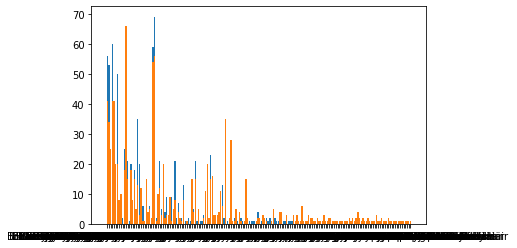

<Figure size 864x432 with 0 Axes>

In [ ]:
bkeys = hashed_bf.keys()
bvalues = hashed_bf.values()
plt.bar(bkeys,bvalues )
akeys = hashed_aft.keys()
avalues = hashed_aft.values()
plt.bar(akeys, avalues)
plt.figure(figsize=(12,6))
plt.ylabel = "Collisions"
plt.xlabel = " "

In [ ]:
## Example code Jaccard similarity
dc_esh_aft1975 = open('DC_eyesexhair_aft1975.txt','r').read()
print(len(dc_esh_aft1975))
print(dc_esh_aft1975)
dc_esh_bef1975 = open('DC_eyesexhair_bef1975.txt','r').read()
print(len(dc_esh_bef1975))
print(dc_esh_bef1975)


w_a1975 = dc_esh_aft1975.split()
w_b1975 = dc_esh_bef1975.split()
print(w_a1975)
print(w_b1975)
print(sim(set(w_a1975), set(w_b1975)))